<a href="https://colab.research.google.com/github/osamanoor17/Treadmill-Buyer-Profile/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation of Libraries**

In [3]:
pip install pandas numpy matplotlib seaborn

Load the dataset from a url

In [2]:
import pandas as pd

# loading titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

Show the data of first 5 rows

In [4]:
# Pehle 5 rows dekh lo
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Basic data info

In [5]:
# Shape (rows, columns)
print("Shape:", data.shape)

# checking of data types of columns and missing data.
print("\nInfo:")
print(data.info())

# Summary statistics
print("\nDescribe:")
print(data.describe())


Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.5230

Finding the missing values

In [6]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


FInding missing values

In [7]:
# Step 4: Missing Values Check
print("\nMissing Values in Each Column:\n", data.isnull().sum())

# Step 4.1: Handling Missing Values

# 1. Numerical Columns - Fill with Median
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if data[col].isnull().sum() > 0:
        median = data[col].median()
        data[col].fillna(median, inplace=True)
        print(f"Filled missing values in {col} with Median: {median}")

# 2. Categorical Columns - Fill with Mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace=True)
        print(f"Filled missing values in {col} with Mode: {mode}")

# 3. If needed, you can also Drop if too many missing values
# Example: Drop columns with more than 50% missing data
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]



Missing Values in Each Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Filled missing values in Age with Median: 28.0
Filled missing values in Cabin with Mode: B96 B98
Filled missing values in Embarked with Mode: S


<ipython-input-7-7c8f2a36ec61>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median, inplace=True)
<ipython-input-7-7c8f2a36ec61>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [8]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


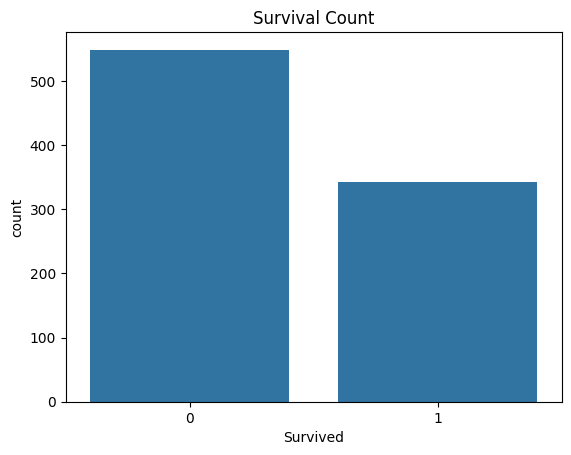

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()
# 0=dead, 1=alive

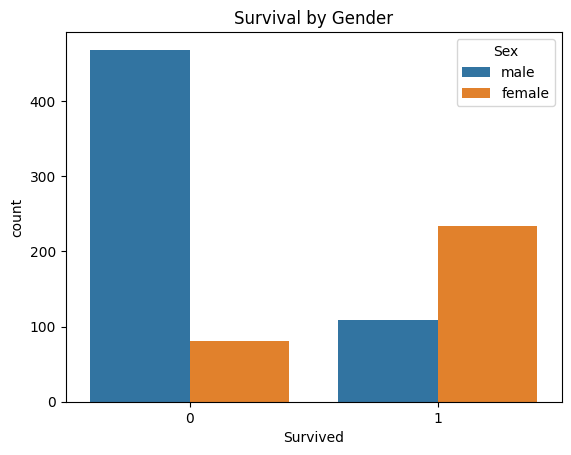

In [10]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()
# 0=dead, 1=alive

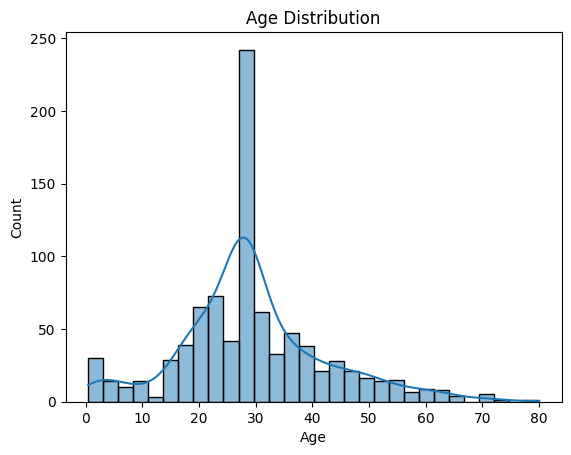

In [11]:
sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()


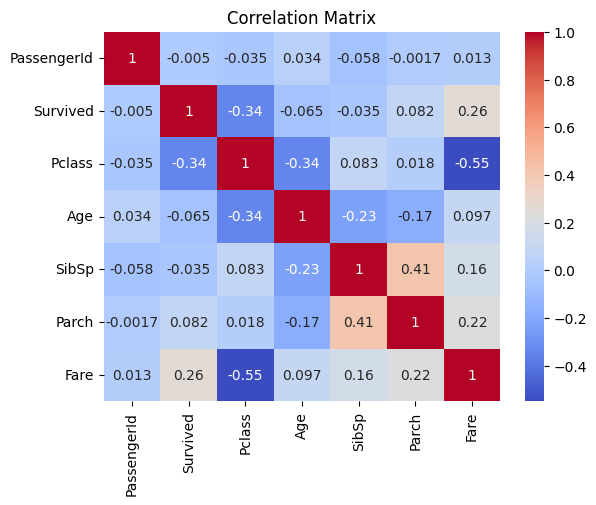

In [13]:
# Sirf numerical columns ke liye correlation
numerical_data = data.select_dtypes(include=['int64', 'float64'])

corr = numerical_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
